# Graphs & Visualizations and Statistical ( descriptive and inferential) Analysis

## Note : after drawing diagram you can provide them GPT to get insights from digram.

### How to Decide Which Graph to Use?

#### Numerical data → Histograms, Box plots, Scatter plots.

#### Categorical data → Bar charts, Pie charts.

#### Comparisons → Grouped bar, Box plots.

#### Relationships → Scatter, Heatmap.

#### Time → Line charts, Area charts.

#### Proportions → Pie, Treemap, Donut.

#### Model evaluation → ROC, Confusion Matrix.

## 1. Univariate (Single Variable) Visualizations  

Used to understand the distribution and spread of one variable.  

---

### Histogram  
- **Purpose**: Shows distribution of numerical data.  
- **Use**: Detect skewness, modality (uni/multi peaks).  
- **Example**: Age distribution of customers.  

---

### Box Plot (Whisker Plot)  
- **Purpose**: Shows median, quartiles, outliers.  
- **Use**: Compare distributions across groups.  
- **Example**: Salary distribution by department.  

---

### Density Plot / KDE Plot  
- **Purpose**: Smoothed histogram.  
- **Use**: See probability distribution clearly.  
- **Example**: Exam scores trend.  

---

### Bar Chart  
- **Purpose**: For categorical data.  
- **Use**: Compare category frequencies.  
- **Example**: Number of customers by region.  


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your file path if needed)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Quick look at the data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Univariate Analysis for Numerical Variables

Columns: tenure, MonthlyCharges, TotalCharges

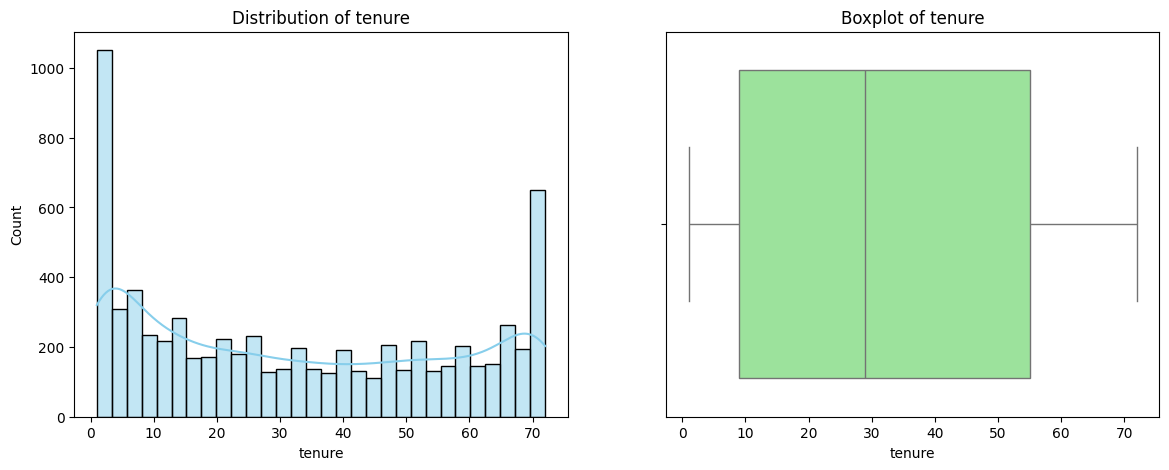

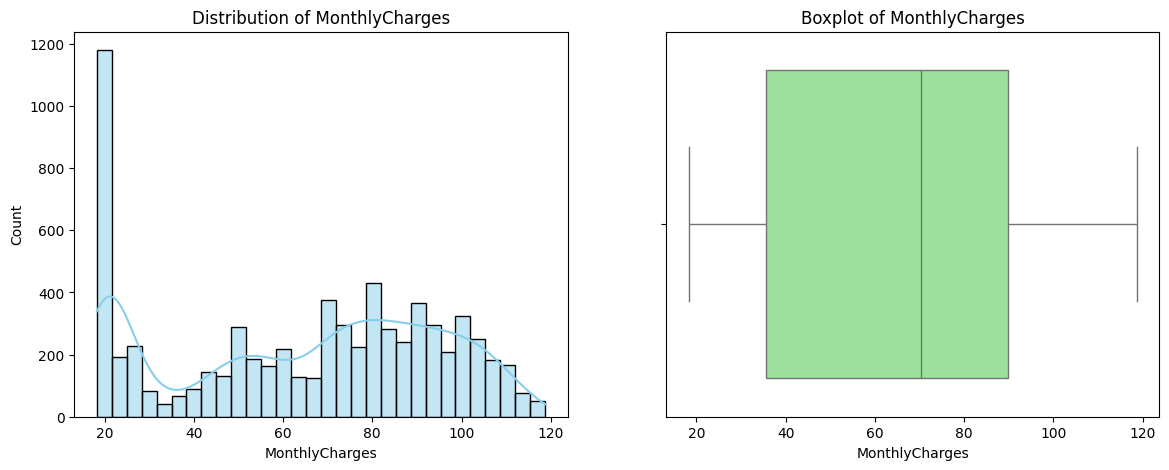

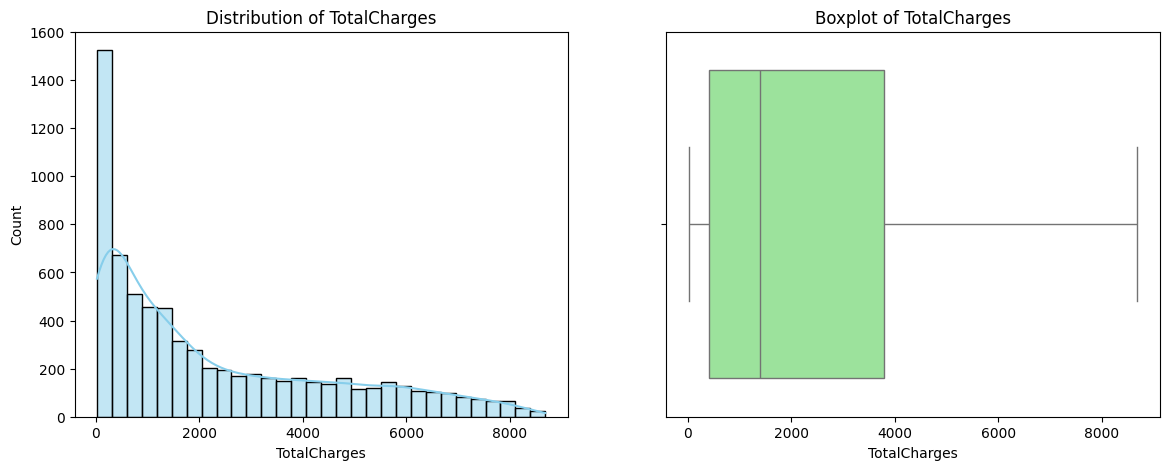

In [2]:
# Convert TotalCharges to numeric (some values may be blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values if any after conversion
df.dropna(subset=['TotalCharges'], inplace=True)

# List of numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

    plt.show()


#### Explanation:

Histogram + KDE → Check distribution (normal/skewed, peaks).

Boxplot → Detect outliers, spread, and median.

### Univariate Analysis for Categorical Variables

Columns like gender, Partner, Dependents, PhoneService, InternetService, Contract, PaymentMethod, Churn etc.

C:\Users\Shrawan Kumar\AppData\Local\Temp\ipykernel_2688\3925330799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


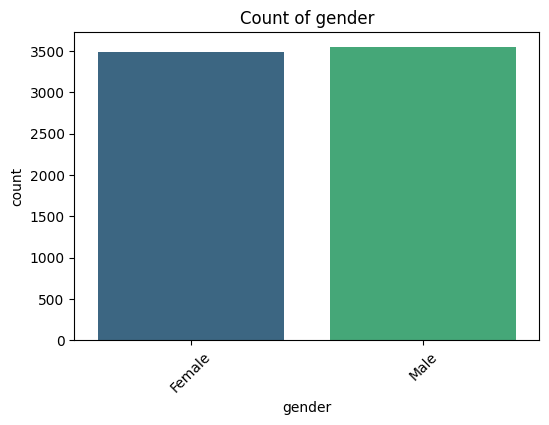

In [5]:
# Exclude ID and numerical columns
cat_cols = df.select_dtypes(include='object').columns.drop('customerID')

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()



    
    break


#### Explanation:

Countplot (Bar chart) → Shows category frequencies.

Rotating labels helps readability for long category names (like PaymentMethod).

## 2. Bivariate (Two Variables) Visualizations  

Used to understand relationships between two variables.  

---

### Scatter Plot  
- **Purpose**: X vs Y relationship.  
- **Use**: Detect correlation, trends, clusters.  
- **Example**: Advertising spend vs revenue.  

---

### Line Chart  
- **Purpose**: Continuous variable across time.  
- **Use**: Time series analysis.  
- **Example**: Stock prices over time.  

---

### Grouped/Stacked Bar Chart  
- **Purpose**: Compare two categorical variables.  
- **Example**: Gender distribution across departments.  

---

### Box Plot (Grouped)  
- **Purpose**: Compare distributions across categories.  
- **Example**: Exam scores by school.  




### Numerical vs Numerical

Check relationships among tenure, MonthlyCharges, and TotalCharges.

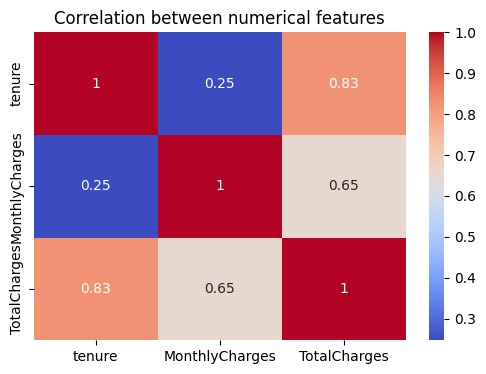

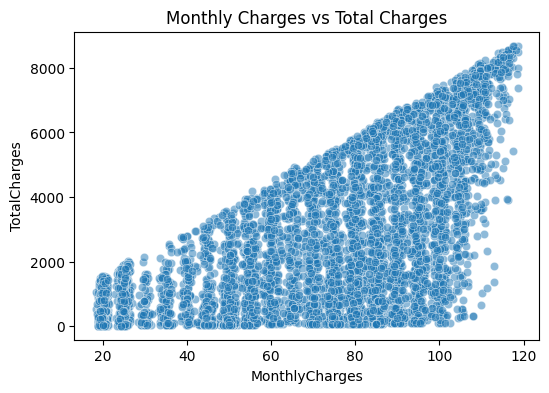

In [6]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numerical features")
plt.show()

# Scatterplot: MonthlyCharges vs TotalCharges
plt.figure(figsize=(6,4))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, alpha=0.5)
plt.title("Monthly Charges vs Total Charges")
plt.show()


### Numerical vs Categorical

Example: Compare tenure or MonthlyCharges across churn status.

C:\Users\Shrawan Kumar\AppData\Local\Temp\ipykernel_2688\2188029649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")


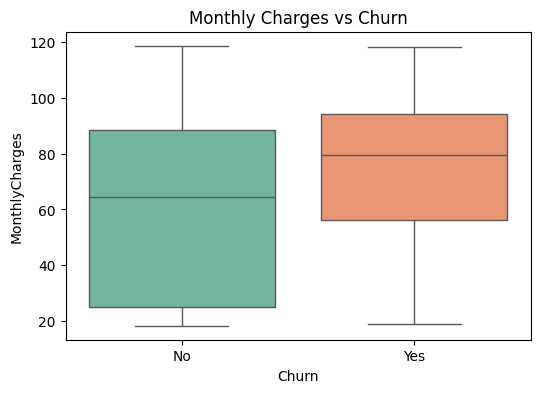

C:\Users\Shrawan Kumar\AppData\Local\Temp\ipykernel_2688\2188029649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")


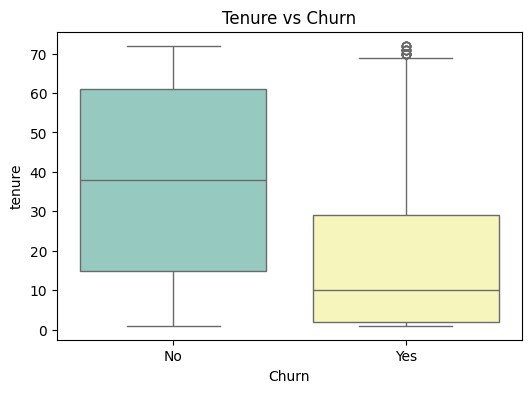

In [7]:
# Boxplot: MonthlyCharges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")
plt.title("Monthly Charges vs Churn")
plt.show()

# Boxplot: Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")
plt.title("Tenure vs Churn")
plt.show()


#### Insights:

Customers who churn tend to have higher MonthlyCharges.

Customers who stay usually have longer tenure.

### Categorical vs Categorical

Example: Contract vs Churn, InternetService vs Churn.

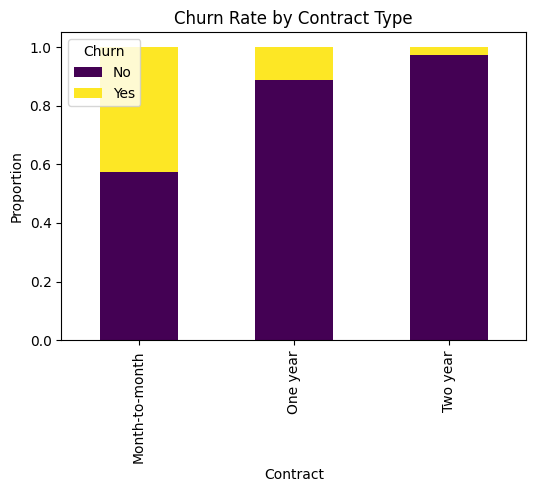

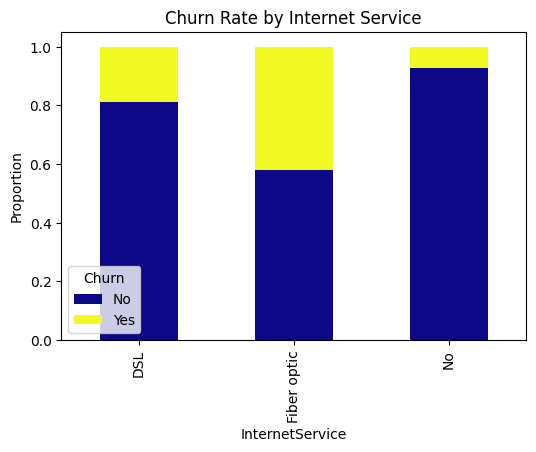

In [8]:
# Cross-tab for Contract vs Churn
ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap="viridis")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()

# Cross-tab for InternetService vs Churn
ct2 = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
ct2.plot(kind='bar', stacked=True, figsize=(6,4), colormap="plasma")
plt.title("Churn Rate by Internet Service")
plt.ylabel("Proportion")
plt.show()


#### Insights:

Month-to-month contracts have the highest churn rate.

Customers with Fiber optic internet churn more compared to DSL or No internet.

### Churn Distribution Across Gender

(Just as an example of categorical vs categorical.)

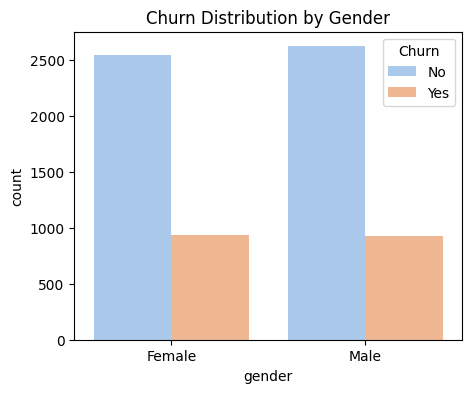

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender", hue="Churn", data=df, palette="pastel")
plt.title("Churn Distribution by Gender")
plt.show()


#### Insights:

Gender usually has less effect on churn compared to services/contract/payment type.

## 3. Multivariate (Three or More Variables) Visualizations  

Used when exploring complex datasets.  

---

### Heatmap  
- **Purpose**: Color-coded matrix.  
- **Use**: Correlation matrix, confusion matrix.  
- **Example**: Correlation between features in a dataset.  

---

### Bubble Chart  
- **Purpose**: Scatter plot with size as third variable.  
- **Example**: GDP (x), Life Expectancy (y), Population (bubble size).  

---

### 3D Scatter Plot  
- **Purpose**: 3 variables in 3D space.  
- **Use**: Rare in practice, but useful for presentations.  

---

### Pair Plot (Seaborn’s `pairplot`)  
- **Purpose**: Scatter plots for all numeric variable pairs.  
- **Use**: Quick EDA (exploratory data analysis).  


### Pair Plot (Numerical Variables with Churn as Hue)

Shows scatterplots for all numeric pairs.

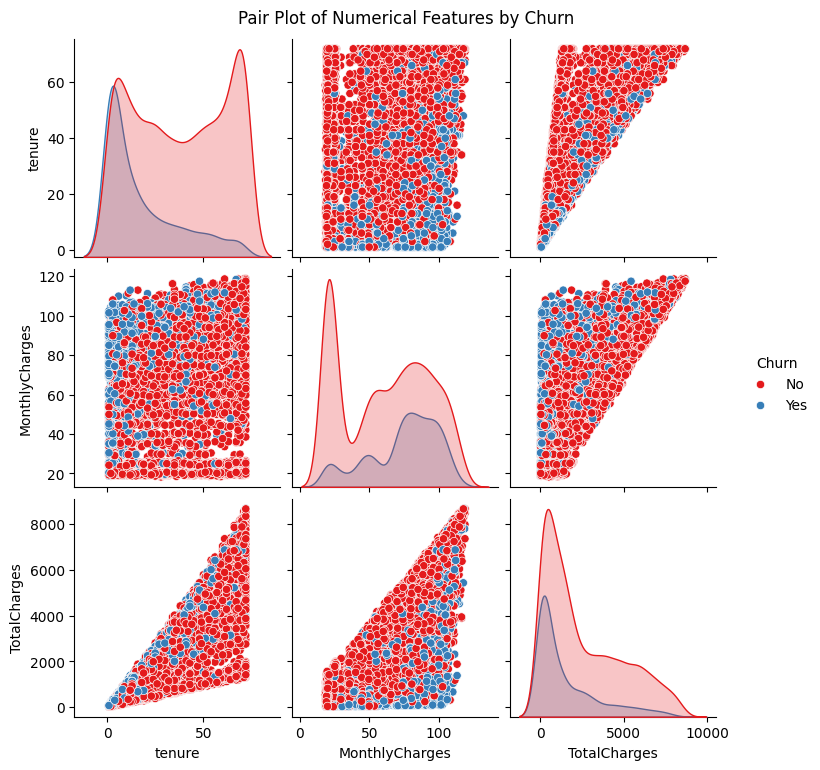

In [10]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']], hue="Churn", diag_kind="kde", palette="Set1")
plt.suptitle("Pair Plot of Numerical Features by Churn", y=1.02)
plt.show()


#### Insights:

Customers who churn often have lower tenure but higher MonthlyCharges.

TotalCharges separates churners vs non-churners (churners usually lower).

### Heatmap of Correlations (with Target Variable)

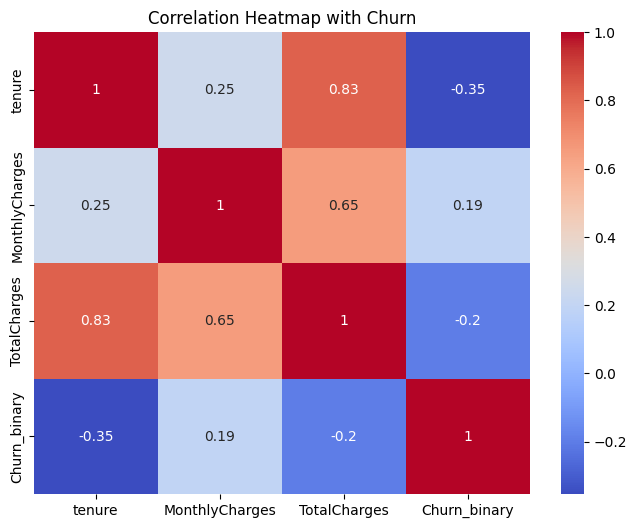

In [11]:
# Convert churn to binary for correlation
df['Churn_binary'] = df['Churn'].map({'Yes':1, 'No':0})

plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges','Churn_binary']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Churn")
plt.show()


#### Insights:

Negative correlation between tenure and Churn_binary (longer tenure → less churn).

Positive correlation between MonthlyCharges and churn.

### Churn by Contract + InternetService

Two categorical variables together.

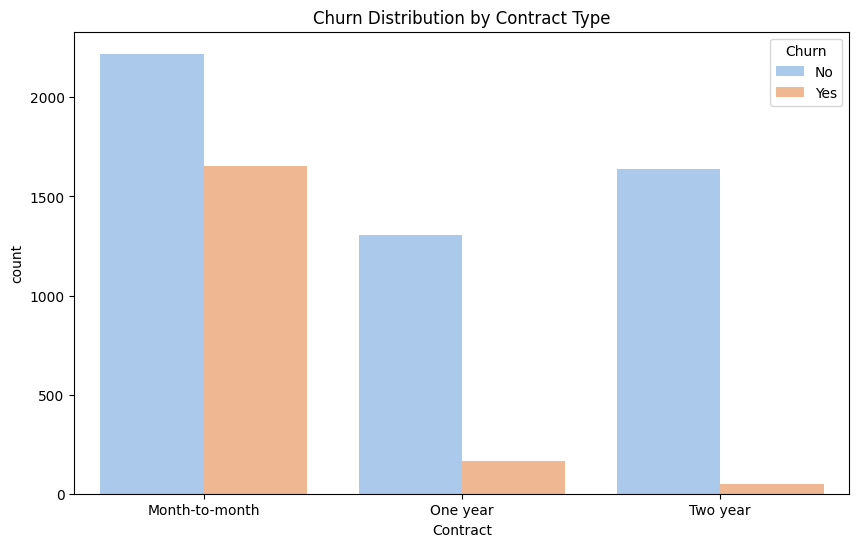

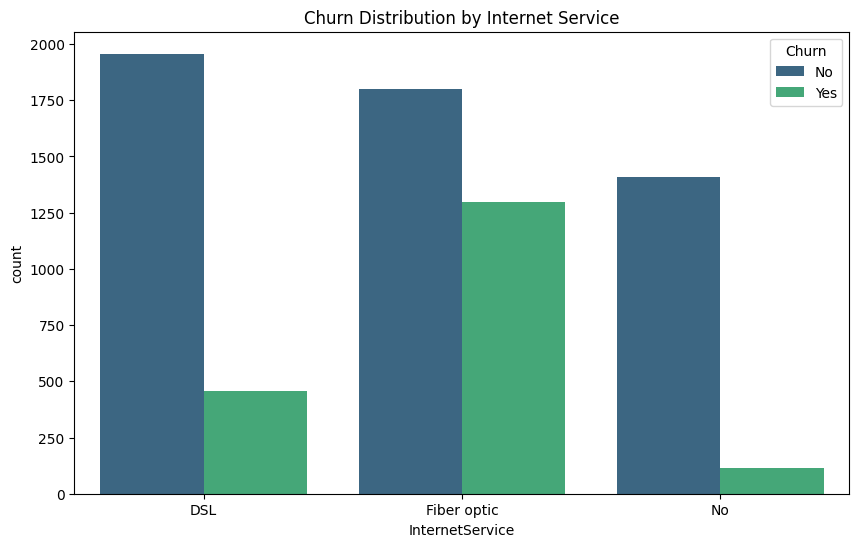

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x="Contract", hue="Churn", data=df, palette="pastel")
plt.title("Churn Distribution by Contract Type")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="viridis")
plt.title("Churn Distribution by Internet Service")
plt.show()


#### Insights:

Month-to-month contracts → higher churn.

Fiber optic users churn more compared to DSL.

### Contract + PaymentMethod + Churn

A grouped bar chart with 3 variables.

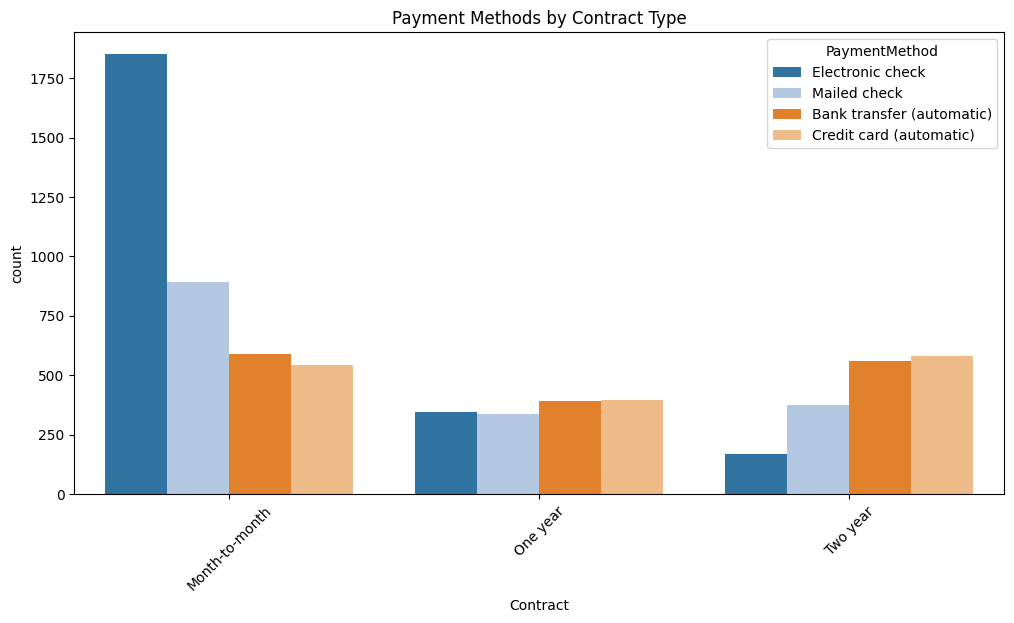

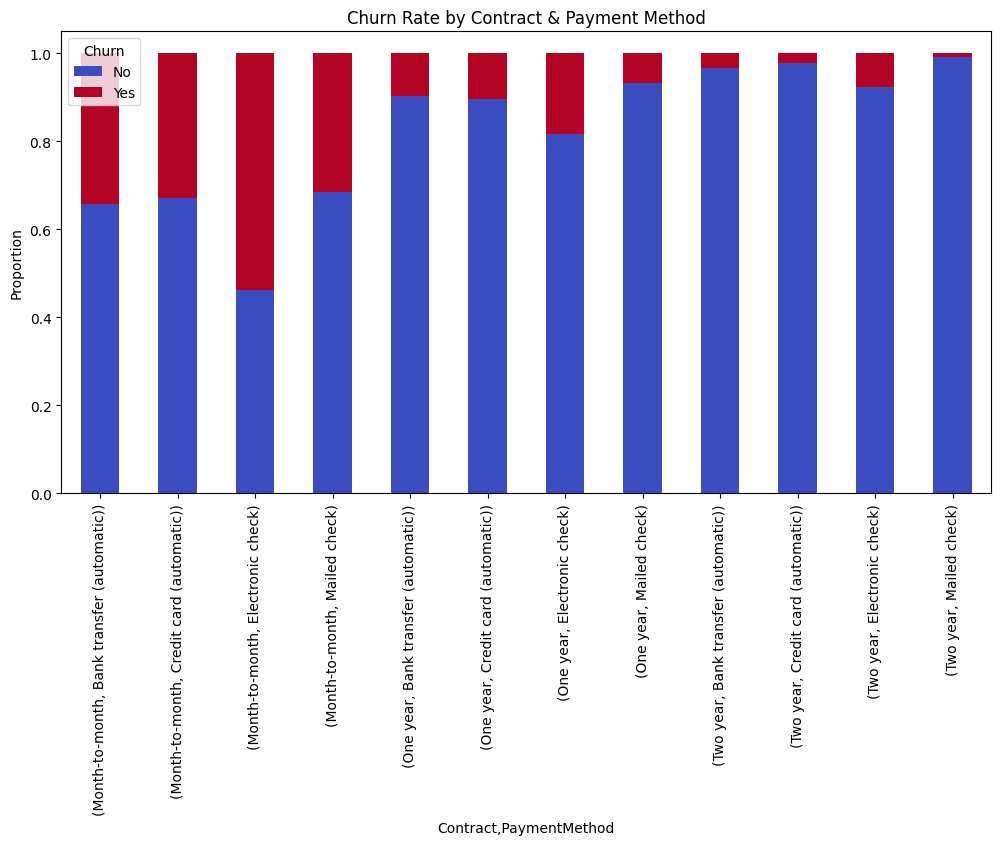

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x="Contract", hue="PaymentMethod", data=df, palette="tab20")
plt.title("Payment Methods by Contract Type")
plt.xticks(rotation=45)
plt.show()

# Stacked churn breakdown
ct = pd.crosstab([df['Contract'], df['PaymentMethod']], df['Churn'], normalize='index')
ct.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")
plt.title("Churn Rate by Contract & Payment Method")
plt.ylabel("Proportion")
plt.show()


## Statistical ( descriptive and inferential) Analysis

### 1. Descriptive Statistics (Summarizing Data)

This helps understand central tendency, spread, and distribution of variables.

In [18]:
import pandas as pd

print("Numerical summary")
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

print("\n")
print("Categorical summary")
for col in df.select_dtypes(include='object').columns.drop('customerID'):
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True)*100)  # percentage


Numerical summary
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


Categorical summary

Value counts for gender:
gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64

Value counts for Partner:
Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64

Value counts for Dependents:
Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64

Value counts for PhoneService:
PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64

Value counts for MultipleLines:
MultipleLines
No                  48.137088
Yes             

### 2. Inferential Statistics (Testing Hypotheses)

This helps test if observed differences are statistically significant (not due to chance).

#### a) T-tests (Numerical vs Categorical: Churn groups)

Compare means of tenure and charges between churned vs non-churned groups.

In [20]:
from scipy import stats

# Tenure
churn_yes = df[df['Churn']=='Yes']['tenure']
churn_no = df[df['Churn']=='No']['tenure']

t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
print("Tenure vs Churn - t-test:", t_stat, p_val)

# MonthlyCharges
churn_yes = df[df['Churn']=='Yes']['MonthlyCharges']
churn_no = df[df['Churn']=='No']['MonthlyCharges']
t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
print("MonthlyCharges vs Churn - t-test:", t_stat, p_val)


Tenure vs Churn - t-test: -34.97187009750348 2.3470747188949526e-234
MonthlyCharges vs Churn - t-test: 18.34091879095257 2.6573571445160267e-72


### 🔎 Results
#### 1. Tenure vs Churn

t_stat = -34.97 (large negative)

p_val ≈ 2.3e-234 (extremely small, basically 0)

#### 👉 Interpretation:

Customers who churned had much lower tenure compared to those who didn’t churn.

The difference is statistically significant (p < 0.05, actually way below).

#### Insight: Customers leave early — long-term customers are much more likely to stay.

#### 2. MonthlyCharges vs Churn

t_stat = 18.34 (large positive)

p_val ≈ 2.6e-72 (again, almost 0)

#### 👉 Interpretation:

Customers who churned had much higher monthly charges compared to those who didn’t churn.

The difference is statistically significant.

#### Insight: High monthly costs are strongly associated with customer churn.

### What “statistically significant (p < 0.05)” means:

#### In a t-test, we test the null hypothesis (H₀):

“There is no difference in means between the two groups (Churn = Yes vs No).”

The test gives us a p-value:

The probability of observing the difference we found (or more extreme) if the null hypothesis were true.

If p < 0.05 (common threshold):

We reject H₀.

Meaning: The difference between groups is unlikely due to random chance.

Therefore, the difference is considered statistically significant.

#### 🔎 In your case:

For tenure vs churn:

p ≈ 2.3 × 10⁻²³⁴ (basically 0).

Far smaller than 0.05 → the difference in tenure is definitely not random.

For monthly charges vs churn:

p ≈ 2.6 × 10⁻⁷² (also almost 0).

Again, very strong evidence the difference is real.

#### 🎯 So in plain English:

“Statistically significant” means:

The differences we see (lower tenure & higher monthly charges for churners) are real and consistent,

not just a coincidence of sampling.

#### b) Chi-square Test (Categorical vs Categorical)

Check if churn is dependent on categories like Contract, PaymentMethod, InternetService.

##### chi-square test of independence → checks whether two categorical variables are independent or associated.

Here:

H₀ (null hypothesis): “Contract type and churn are independent” (no relationship).

H₁ (alternative): “Contract type and churn are associated.”

In [21]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Contract vs Churn - Chi-square test:", chi2, p)

contingency = pd.crosstab(df['InternetService'], df['Churn'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("InternetService vs Churn - Chi-square test:", chi2, p)


Contract vs Churn - Chi-square test: 1179.5458287339445 7.326182186265472e-257
InternetService vs Churn - Chi-square test: 728.6956143058694 5.831198962237274e-159


### 🔎 Your Results
#### 1. Contract vs Churn

Chi² = 1179.55

p ≈ 7.3 × 10⁻²⁵⁷ (basically 0)

#### 👉 Interpretation:

The relationship between Contract type (Month-to-month, One year, Two year) and Churn is highly significant.

Churn depends on contract type.

#### 💡 Likely pattern (from experience with Telco churn dataset):

Month-to-month contracts → much higher churn.

One-year & Two-year contracts → much lower churn (customers are “locked in”).

#### 2. InternetService vs Churn

Chi² = 728.70

p ≈ 5.8 × 10⁻¹⁵⁹ (again, basically 0)

#### 👉 Interpretation:

The type of Internet Service (DSL, Fiber optic, No service) has a strong relationship with churn.

Churn depends on internet service type.

#### 💡 Typical pattern:

Fiber optic customers → higher churn (maybe higher cost / service issues).

DSL customers → moderate churn.

No internet service → very low churn (these customers often take only phone service).

### Note : So “highly significant” means:
👉 The type of contract really matters for whether a customer churns or not.

### c) Correlation Analysis (Numerical features with Churn as binary)

In [22]:
df['Churn_binary'] = df['Churn'].map({'Yes':1,'No':0})
print(df[['tenure','MonthlyCharges','TotalCharges','Churn_binary']].corr())


                  tenure  MonthlyCharges  TotalCharges  Churn_binary
tenure          1.000000        0.246862      0.825880     -0.354049
MonthlyCharges  0.246862        1.000000      0.651065      0.192858
TotalCharges    0.825880        0.651065      1.000000     -0.199484
Churn_binary   -0.354049        0.192858     -0.199484      1.000000


## 📌 Why We Use Specific Statistical Tests  

---

### 1. Descriptive Statistics  
**What it does:** Summarizes the data (mean, median, mode, variance, counts, percentages).  

**Why we use:** To describe the population or dataset without making conclusions beyond it.  

**Where used:** First step in EDA — you’ll know “what the data looks like” before testing hypotheses.  

**Example in churn:**  
- Average tenure = 32 months.  
- 26% customers churned.  
- 60% are on month-to-month contracts.  

---

### 2. T-test (Independent Samples T-test)  
**What it does:** Compares the mean values of a numerical variable across two groups.  

**Why we use:** To see if the difference in means is statistically significant (not due to chance).  

**Assumptions:**  
- Groups are independent (e.g., churned vs non-churned customers).  
- Data is approximately normally distributed (large sample size helps).  

**Where used:** Numerical vs binary categorical variable.  

**Example in churn:**  
- **Test:** Do churned and non-churned customers have different average `MonthlyCharges`?  
- **Insight:** If p-value < 0.05 → churners truly pay higher monthly charges on average.  

---

### 3. Chi-square Test of Independence  
**What it does:** Tests whether two categorical variables are independent or related.  

**Why we use:** To see if churn probability depends on categories (contract type, payment method, internet service, etc.).  

**Assumptions:**  
- Categories are mutually exclusive.  
- Sample size large enough (expected counts > 5 ideally).  

**Where used:** Categorical vs categorical variables.  

**Example in churn:**  
- **Test:** Is churn independent of `Contract` type?  
- **Insight:** If p < 0.05 → churn is strongly related to contract type.  

---

### 4. Correlation (Pearson Correlation Coefficient)  
**What it does:** Measures linear relationship between two numerical variables (ranges from -1 to +1).  

**Why we use:** To quantify how strongly variables move together.  

**Where used:** Numerical vs numerical variables.  

**Example in churn:**  
- `tenure` vs `TotalCharges` → Strong positive correlation.  
- `tenure` vs `Churn_binary` → Negative correlation (longer tenure → less churn).  

---

### 5. ANOVA (Analysis of Variance) – optional extension  
**What it does:** Compares means across more than 2 groups.  

**Why we use:** When independent variable has >2 categories.  

**Where used:** Numerical vs categorical (with >2 groups).  

**Example in churn:**  
- **Test:** Do `MonthlyCharges` differ significantly across **Contract types** (Month-to-month, One year, Two year)?  
- **Insight:** ANOVA is better here than multiple t-tests.  

---

### 📊 Summary Table  

| Test Type            | Data Type                  | Use Case in Churn           | Example                                |
|-----------------------|----------------------------|-----------------------------|----------------------------------------|
| **Descriptive Stats** | Any                        | Summarize data              | % churned, avg tenure                  |
| **T-test**            | Numerical vs Binary        | Compare two groups          | MonthlyCharges (Yes vs No churn)       |
| **Chi-square**        | Categorical vs Categorical | Test dependence             | Contract type vs Churn                 |
| **Correlation**       | Numerical vs Numerical     | Check linear relation       | Tenure vs TotalCharges                 |
| **ANOVA**             | Numerical vs Multi-category| Compare >2 groups           | MonthlyCharges across Contract types   |
